In [3]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist


In [4]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]


In [5]:
print(X_train.shape)

(50000, 28, 28)


In [6]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [32]:
X_train.shape

(50000, 28, 28, 1)

In [16]:
# 4. One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[3])
print('Dữ liệu y sau one-hot encoding ',Y_train[3])
Y_train.shape


Dữ liệu y ban đầu  1
Dữ liệu y sau one-hot encoding  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


(50000, 10)

In [34]:
# 5. Định nghĩa model
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

In [36]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
optimizer=Adam(),
metrics=['accuracy'])

In [37]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=10, verbose=1)


Epoch 1/10


1563/1563 [==============================] - 14s 8ms/step - loss: 0.2765 - accuracy: 0.9255 - val_loss: 0.0720 - val_accuracy: 0.9814
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0500 - val_accuracy: 0.9856
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0347 - accuracy: 0.9900 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0454 - val_accuracy: 0.9873
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.0385 - val_accuracy: 0.9887
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0379 - val_accuracy: 0.9894
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0077 - accuracy: 0.9981 - val_loss: 0.0409 - val_

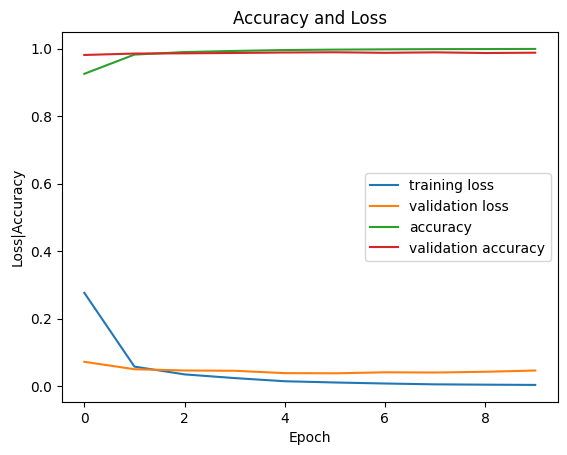

In [39]:
# 8. Vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()


In [40]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.038155291229486465, 0.9883000254631042]


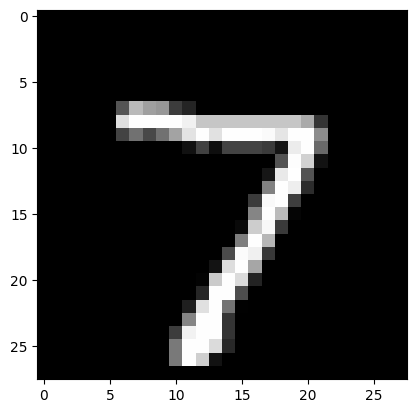

In [41]:
# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')


In [42]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))


1/1 [==============================] - 0s 64ms/step
Giá trị dự đoán:  7
